In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


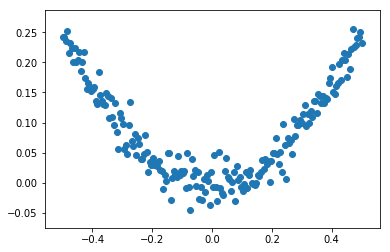

0


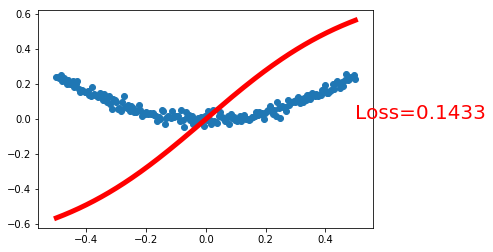

100


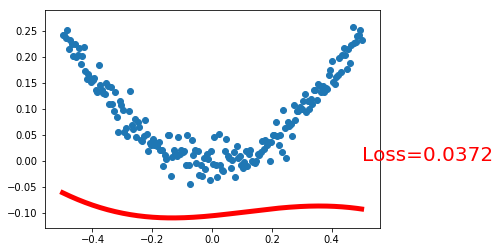

200


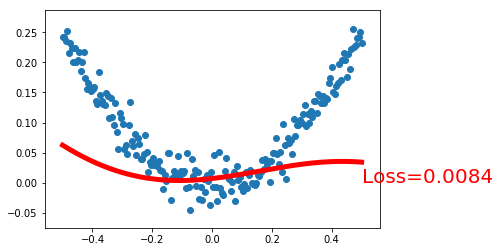

300


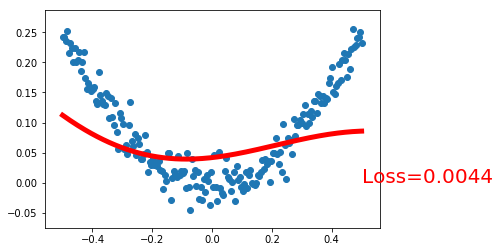

400


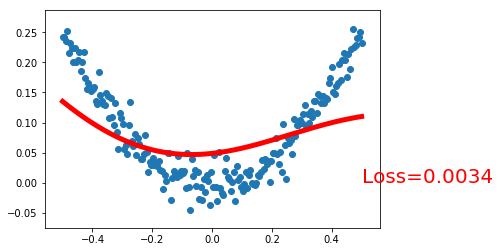

500


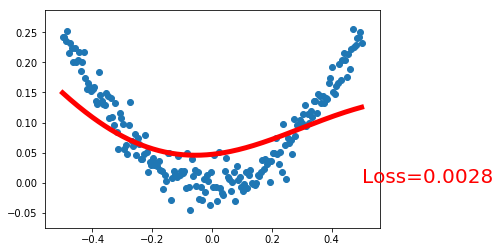

600


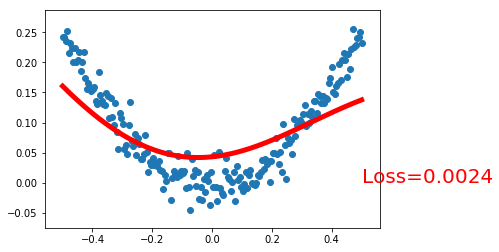

700


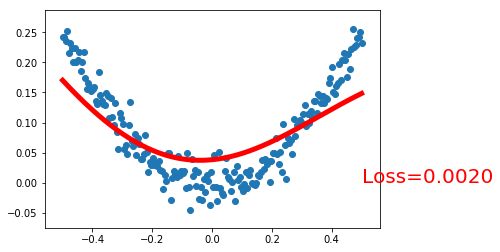

800


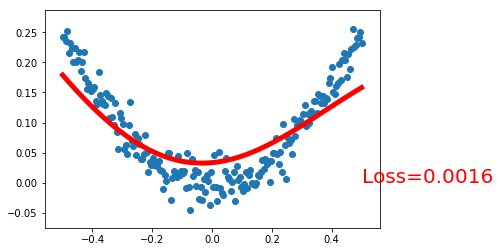

900


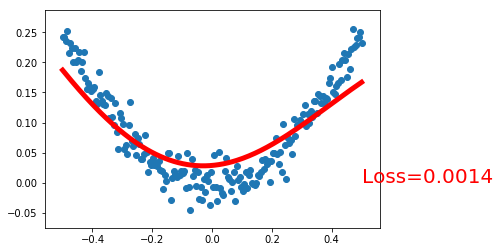

1000


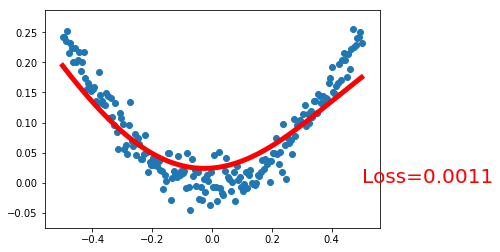

In [4]:
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

plt.scatter(x_data, y_data)
plt.show()


x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

#构建神经网络结构中间层
Weights_L1 = tf.Variable(tf.random_normal([1, 10]))
Biases_L1 = tf.Variable(tf.zeros([1, 10]))

WX_B_L1 = tf.matmul(x, Weights_L1) + Biases_L1    #线性矩阵
L1 = tf.nn.tanh(WX_B_L1)   #激活函数
#L1 = tf.nn.relu(WX_B_L1)   #激活函数

#定义输出层
Weights_L2 = tf.Variable(tf.random_normal([10, 1]))
Biases_L2 = tf.Variable(tf.zeros([1, 1]))

WX_B_L2 = tf.matmul(L1, Weights_L2) + Biases_L2    #线性矩阵
# pred = tf.nn.tanh(WX_B_L2)   #激活函数
pred = tf.nn.tanh(WX_B_L2)   #激活函数

#二次代价函数
loss = tf.reduce_mean(tf.square(y - pred))

#最小化代价函数
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

plt.ion()

with tf.Session() as sess:
    sess.run(init)
    for step in range(1001):
        _, l, prediction = sess.run([train, loss, pred], feed_dict={x:x_data, y:y_data})
        if(step%100 == 0):
            print(step)
#             prediction = sess.run(pred, feed_dict={x:x_data})
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            plt.cla()
            plt.scatter(x_data, y_data)
            plt.plot(x_data, prediction, 'r-', lw=5)
            plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
            plt.pause(0.1)
plt.ioff()
plt.show()
        
#     print(sess.run(pred, feed_dict={x:[[0.5]]}))
#     print(sess.run(Weights_L1))
#     print(sess.run(Biases_L2))
    
    